#Install

In [45]:
!pip install chart_studio
!pip install matplotlib-venn
!pip install -U scikit-learn

# Import Library

In [16]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline
from pylab import rcParams
from chart_studio import plotly as py
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA



In [17]:
Goggle = pd.read_csv('/content/GOOG.csv', index_col='Date', parse_dates=['Date'])
Goggle.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [18]:
Goggle.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-27,2831.709961,2850.000000,2810.000000,2830.020020,2830.020020,942200
2021-09-28,2781.770020,2792.129883,2714.000000,2723.679932,2723.679932,2109500
2021-09-29,2742.194092,2747.969971,2685.000000,2690.419922,2690.419922,1316900
2021-09-30,2686.500000,2711.800049,2660.000000,2665.310059,2665.310059,1764700
2021-10-01,2671.090088,2741.419922,2667.550049,2729.250000,2729.250000,1419400
2021-10-04,2713.989990,2714.000000,2623.330078,2675.300049,2675.300049,1576500
2021-10-05,2680.000000,2747.239990,2680.000000,2723.540039,2723.540039,1206300
2021-10-06,2692.510010,2757.040039,2689.729980,2747.080078,2747.080078,988200
2021-10-07,2777.260010,2803.089111,2771.260010,2783.709961,2783.709961,912500


In [19]:
Goggle.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Visualisasi Dataset

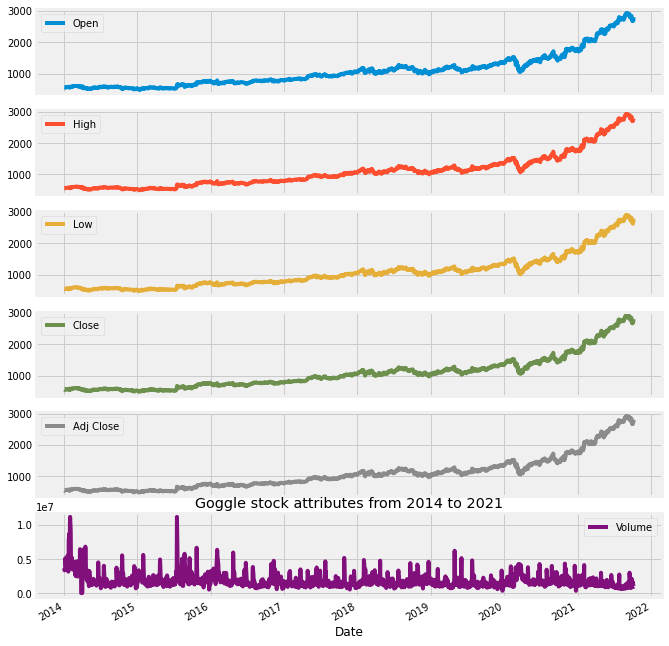

In [20]:
Goggle['2014':'2021'].plot(subplots=True, figsize=(10,12))
plt.title('Goggle stock attributes from 2014 to 2021')
plt.savefig('stocks.png')
plt.show()

# Statistics

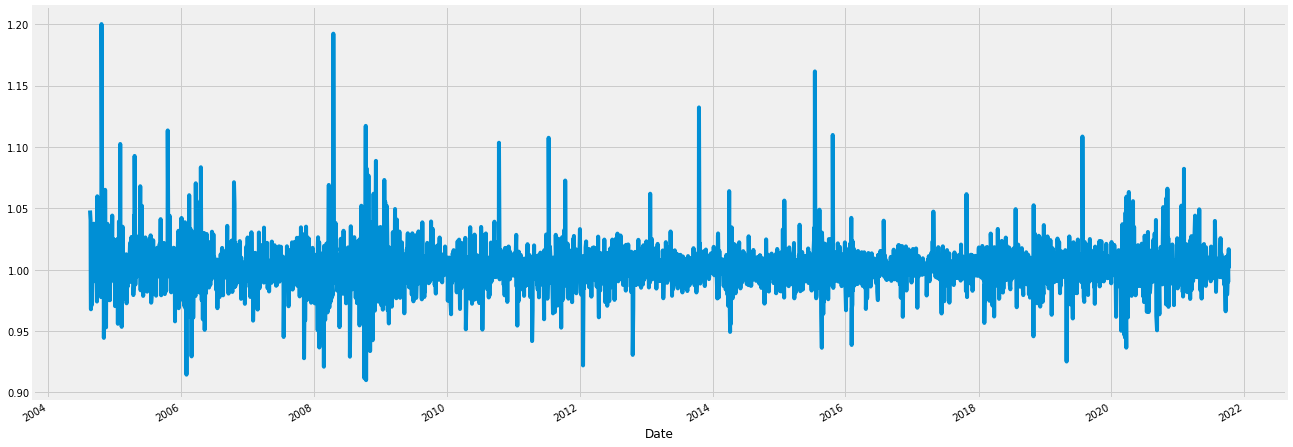

In [21]:
Goggle['Change'] = Goggle.High.div(Goggle.High.shift())
Goggle['Change'].plot(figsize=(20,8))

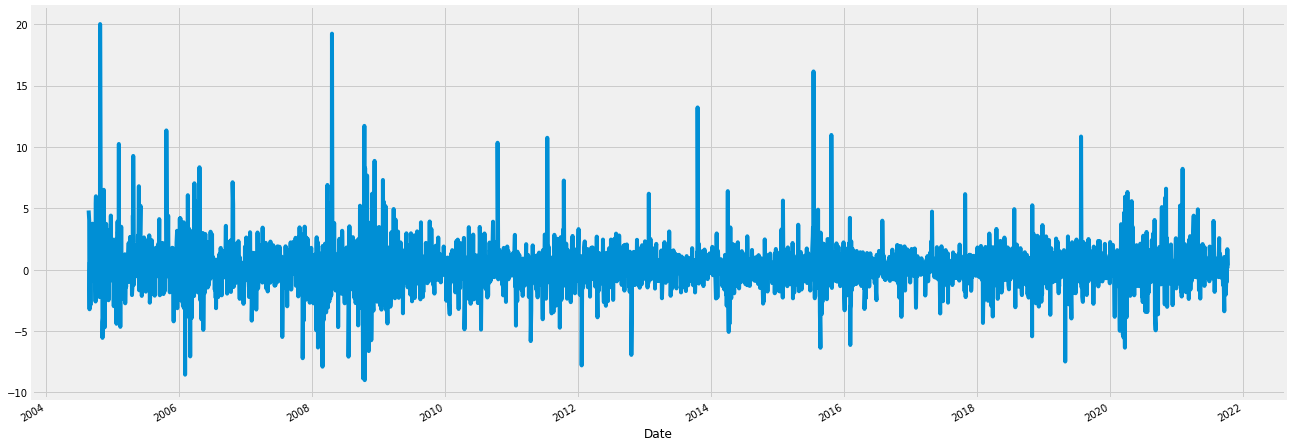

In [22]:
Goggle['Return'] = Goggle.Change.sub(1).mul(100)
Goggle['Return'].plot(figsize=(20,8))

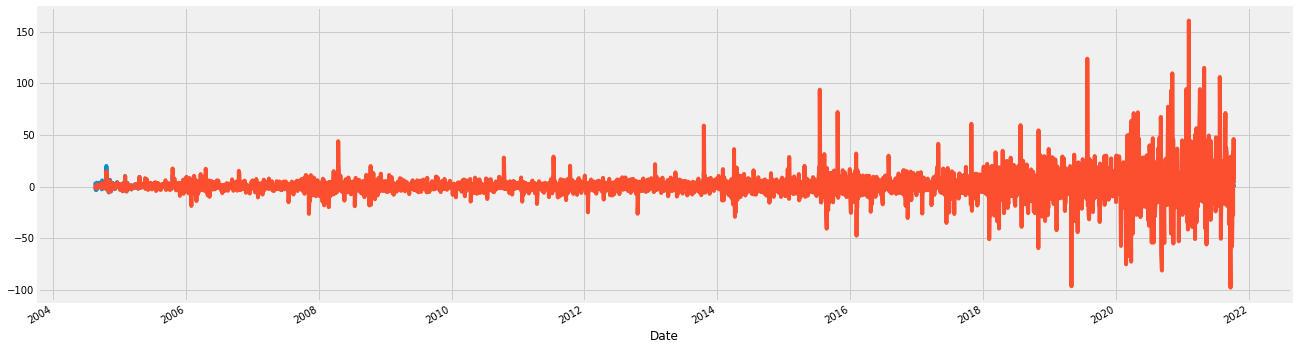

In [23]:
Goggle.High.pct_change().mul(100).plot(figsize=(20,6)) # Another way to calculate returns
Goggle.High.diff().plot(figsize=(20,6))

In [25]:
from google.colab import data_table
data_table.DataTable(Goggle)


,Open,High,Low,Close,Adj Close,Volume,Change,Return
Date,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,NaN,NaN
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,1.048241,4.824136
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,1.040337,4.033736
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,0.983433,-1.656678
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,0.967742,-3.225806
...,...,...,...,...,...,...,...,...
2021-10-04,2713.989990,2714.000000,2623.330078,2675.300049,2675.300049,1576500,0.989998,-1.000209
2021-10-05,2680.000000,2747.239990,2680.000000,2723.540039,2723.540039,1206300,1.012248,1.224760
2021-10-06,2692.510010,2757.040039,2689.729980,2747.080078,2747.080078,988200,1.003567,0.356723


# ACF dan PACF

1. Autocorrelation - The autocorrelation function (ACF) measures how a series i correlated with itself at different lags.
2. Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

source : https://www.quora.com/What-is-the-intuitive-understanding-of-ACF-and-PACF)


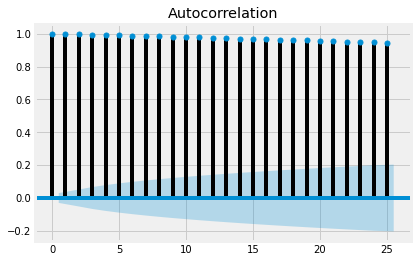

In [32]:
# Autocorrelation of closing price of Goggle stocks
plot_acf(Goggle["Close"],lags=25)
plt.show()


In [ ]:
# Partial Autocorrelation of closing price of Goggle stocks
plot_pacf(Goggle["Close"],lags=25)
plt.show()

# Time Series Decomposition and Random Walk
Time series analysis is widely used to forecast logistics, production or other business processes. Usually you want to understand if there is a trend or a seasonality in the time series. This could support forecasting and planning. However, there are different approaches to understanding trend. While trend often refers to historical changes of data, for me, trend is nothing that happens in the past (this is more like a historical drift), but trend implies a prediction of future behavior. Or, in other words, a positive trend means that it is likely that the growth continues. 

Source : https://www.oraylis.de/blog/2015/trend-in-times-series-analysis

Trend is a pattern in data that shows the movement of a series to relatively higher or lower values over a long period of time. In other words, a trend is observed when there is an increasing or decreasing slope in the time series. Trend usually happens for some time and then disappears, it does not repeat.

Source : https://www.geeksforgeeks.org/what-is-a-trend-in-time-series/



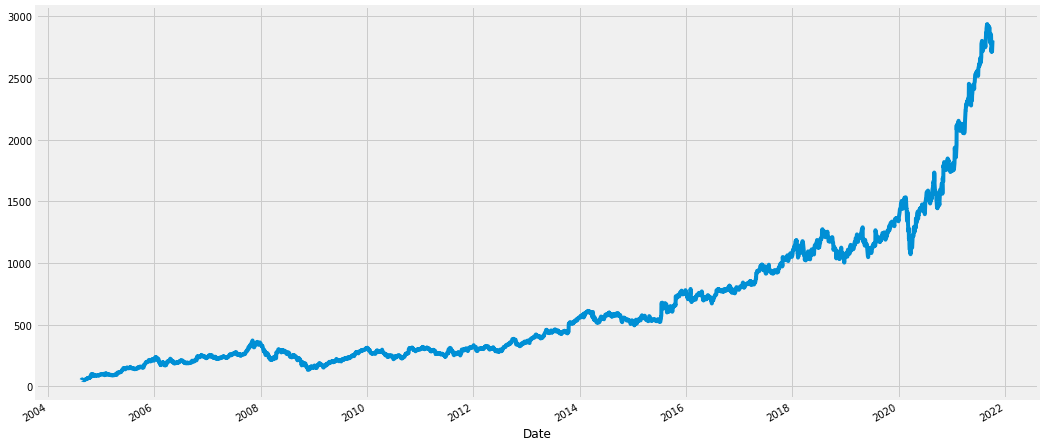

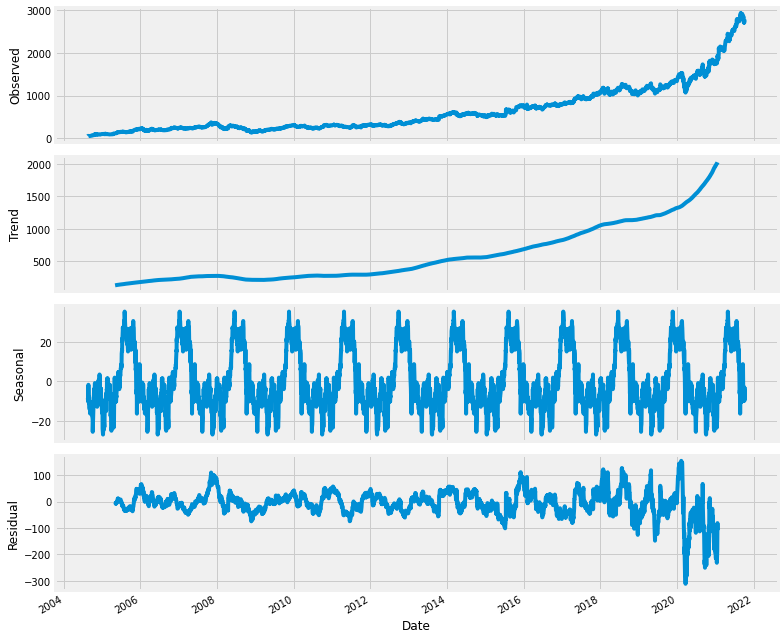

In [33]:
# Let's take Goggle stocks High for this
Goggle["High"].plot(figsize=(16,8))
# Now, for decomposition.
rcParams['figure.figsize'] = 11, 9
decomposed_Goggle_volume = sm.tsa.seasonal_decompose(Goggle["High"],freq=360) # The frequncy is annual
figure = decomposed_Goggle_volume.plot()
plt.show()